In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data = pd.read_csv('iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [6]:
data.drop(columns = ['Id'], inplace = True)

In [7]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.mean(numeric_only=True)

SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
dtype: float64

In [9]:
data.median(numeric_only=True)

SepalLengthCm    5.80
SepalWidthCm     3.00
PetalLengthCm    4.35
PetalWidthCm     1.30
dtype: float64

In [10]:
data.mode(numeric_only = True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.0,3.0,1.5,0.2


In [11]:
data.quantile(0.25)

SepalLengthCm    5.1
SepalWidthCm     2.8
PetalLengthCm    1.6
PetalWidthCm     0.3
Name: 0.25, dtype: float64

In [12]:
data.quantile(0.75)

SepalLengthCm    6.4
SepalWidthCm     3.3
PetalLengthCm    5.1
PetalWidthCm     1.8
Name: 0.75, dtype: float64

In [13]:
data.quantile(0.9)

SepalLengthCm    6.90
SepalWidthCm     3.61
PetalLengthCm    5.80
PetalWidthCm     2.20
Name: 0.9, dtype: float64

In [14]:
data.quantile(0.99)

SepalLengthCm    7.700
SepalWidthCm     4.151
PetalLengthCm    6.700
PetalWidthCm     2.500
Name: 0.99, dtype: float64

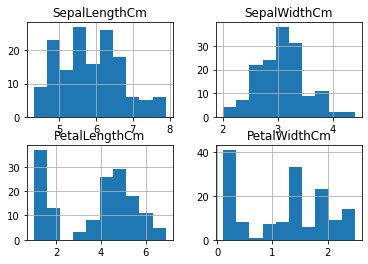

<Figure size 1080x720 with 0 Axes>

In [15]:

data.loc[:, :].hist() 
plt.figure(figsize=(15,10))
plt.show()

In [1]:
corr = data.corr()
plt.figure(figsize=(10,8)) 
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True)
plt.show()

NameError: name 'data' is not defined

<AxesSubplot:title={'center':'Iris Sepal Width'}, xlabel='Species', ylabel='SepalWidthCm'>

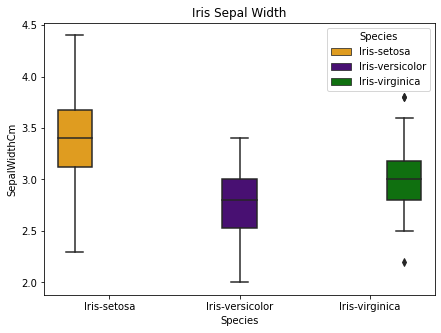

In [17]:
plt.figure(figsize=(7,5))
plt.title("Iris Sepal Width")
sns.boxplot(x=data["Species"],y=data["SepalWidthCm"], hue=data["Species"],palette=("orange","indigo","green"))

In [18]:
setosasepal = data[data['Species'] == 'Iris-setosa']
versicolorsepal = data.loc[data['Species'] == 'Iris-versicolor']

In [19]:
data.groupby('Species')['SepalWidthCm'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Iris-setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
Iris-versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


In [20]:
stats.shapiro(setosasepal['SepalWidthCm'])

ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427)

In [21]:
stats.shapiro(versicolorsepal['SepalWidthCm'])

ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)

In [22]:
stats.levene(setosasepal['SepalWidthCm'], versicolorsepal['SepalWidthCm'])

LeveneResult(statistic=0.6635459332943233, pvalue=0.41728596812962016)

In [23]:
stats.ttest_ind(setosasepal['SepalWidthCm'], versicolorsepal['SepalWidthCm'])

Ttest_indResult(statistic=9.282772555558111, pvalue=4.362239016010214e-15)

Setosa sepal width is wider than Versicolor